In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel('URINE HPV DATA for Analysis.xlsx')

In [3]:
df

,Unnamed: 0,LAB NO,Age Group,Age,Workplace (hmantut),Education,Marital Status (Married/unmarried),Age of Marriage,Age of first pregnancy (years),Age of first pregnancy (years) (CODE),...,TYPE 51,TYPE 52,TYPE 53,TYPE 56,TYPE 58,TYPE 59,TYPE 66,TYPE 68,TYPE 73,TYPE 82
0,1,HPV 146,1,31,1,4,1,28,30,3,...,2,2,2,2,2,2,2,2,2,2
1,2,HPV 147,1,32,0,2,1,22,22,2,...,0,0,0,0,0,0,0,0,0,0
2,3,HPV 148,3,49,0,1,0,23,23,2,...,2,2,2,2,2,2,2,2,2,2
3,4,HPV 150,2,45,0,2,1,24,24,2,...,2,2,2,2,2,2,2,2,2,2
4,5,HPV 151,1,29,0,3,1,24,24,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,517,HPV-1264,3,47,0,3,1,22,23,2,...,2,2,2,2,2,2,2,2,2,2
511,518,HPV-1269,1,34,0,4,1,29,30,3,...,2,2,2,2,2,2,2,2,2,2
512,519,HPV-1270,2,44,1,2,1,29,30,3,...,2,2,2,2,2,2,2,2,2,2
513,520,HPV-1271,1,30,2,5,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
df = df.drop(columns=['Unnamed: 0', 'Age of first pregnancy (years) (CODE)'])


df.rename(columns={
    'Marital Status (Married/unmarried)': 'Marital_Status',
    'Workplace (hmantut)': 'Workplace',
    'Age of first pregnancy (years)': 'Age_First_Pregnancy',
}, inplace=True)

In [5]:
df.describe()

,Age Group,Age,Workplace,Education,Marital_Status,Age of Marriage,Age_First_Pregnancy,total No of pregnancy,total No of pregnancy (CODE),Use of sanitary pads,...,TYPE 45,TYPE 51,TYPE 52,TYPE 53,TYPE 56,TYPE 59,TYPE 66,TYPE 68,TYPE 73,TYPE 82
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,492.000000,515.000000,515.000000,...,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,2.100971,41.491262,0.539806,2.733981,0.920388,24.036893,23.242718,3.201220,1.794175,0.994175,...,1.739806,1.743689,1.747573,1.743689,1.739806,1.741748,1.747573,1.739806,1.739806,1.741748
std,0.826070,7.790884,0.980286,1.062772,0.270954,6.832957,7.026722,1.429311,0.503263,0.076175,...,0.673475,0.666262,0.658947,0.666262,0.673475,0.669881,0.658947,0.673475,0.673475,0.669881
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,36.000000,0.000000,2.000000,1.000000,20.000000,20.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,40.000000,0.000000,3.000000,1.000000,23.000000,23.000000,3.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,47.000000,1.000000,4.000000,1.000000,27.000000,27.000000,4.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,63.000000,3.000000,5.000000,1.000000,62.000000,43.000000,8.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


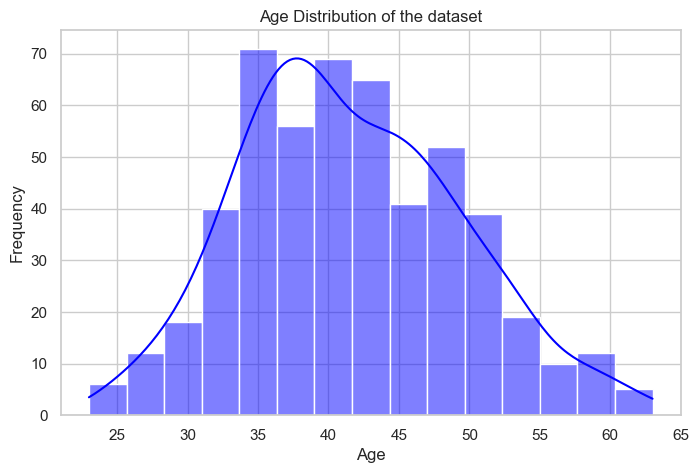

In [6]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=15, kde=True, color="blue")
plt.title("Age Distribution of the dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# HPV Status vs Age for Cervical Swab

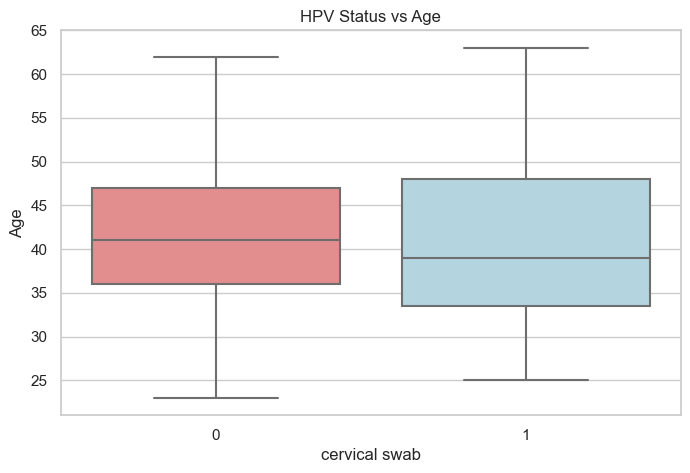

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="cervical swab", y="Age", data=df, palette=["lightcoral", "lightblue"])
plt.title("HPV Status vs Age")
plt.show()

# HPV Status vs Age for urine test

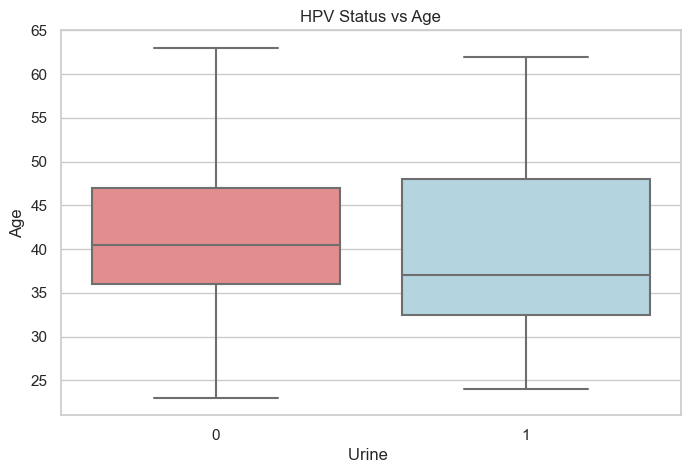

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Urine ", y="Age", data=df, palette=["lightcoral", "lightblue"])
plt.title("HPV Status vs Age")
plt.show()

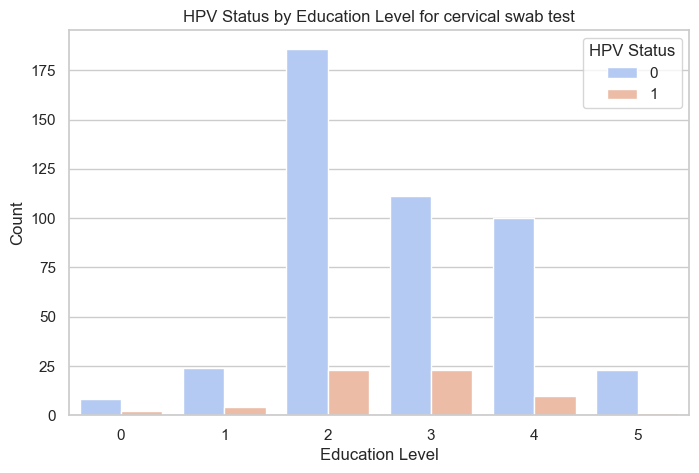

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x="Education", hue="cervical swab", data=df, palette="coolwarm")
plt.title("HPV Status by Education Level for cervical swab test")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="HPV Status")
plt.show()

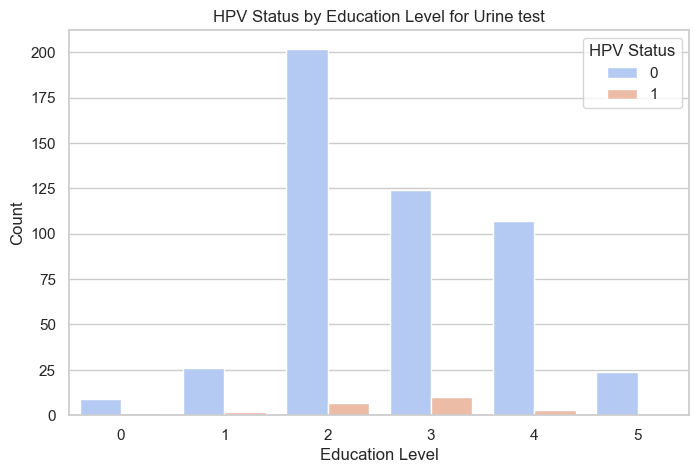

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x="Education", hue="Urine ", data=df, palette="coolwarm")
plt.title("HPV Status by Education Level for Urine test")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="HPV Status")
plt.show()

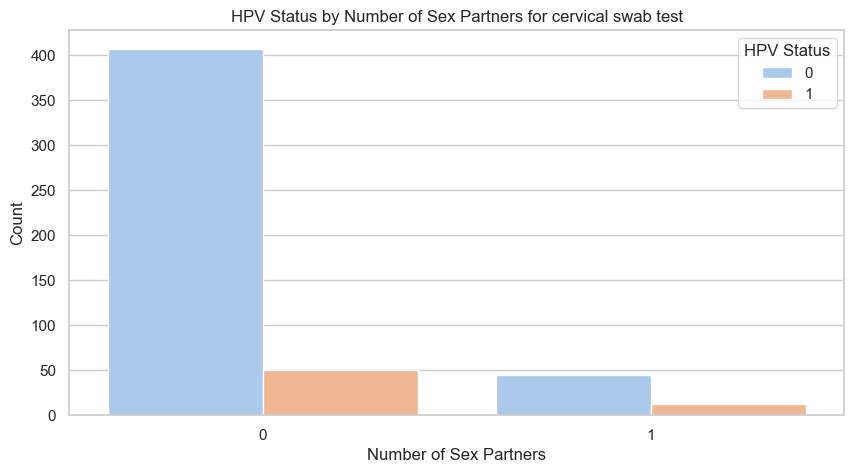

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="total No of sex partners", hue="cervical swab", data=df, palette="pastel")
plt.title("HPV Status by Number of Sex Partners for cervical swab test")
plt.xlabel("Number of Sex Partners")
plt.ylabel("Count")
plt.legend(title="HPV Status")
plt.show()

# For Cervical Swab test

In [12]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df["total No of sex partners"], df["cervical swab"])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between number of sex partners and HPV status.")
else:
    print("No significant relationship found between number of sex partners and HPV status.")

Chi-Square Statistic: 5.2864788913438385
P-value: 0.021491631805546765
There is a significant relationship between number of sex partners and HPV status.


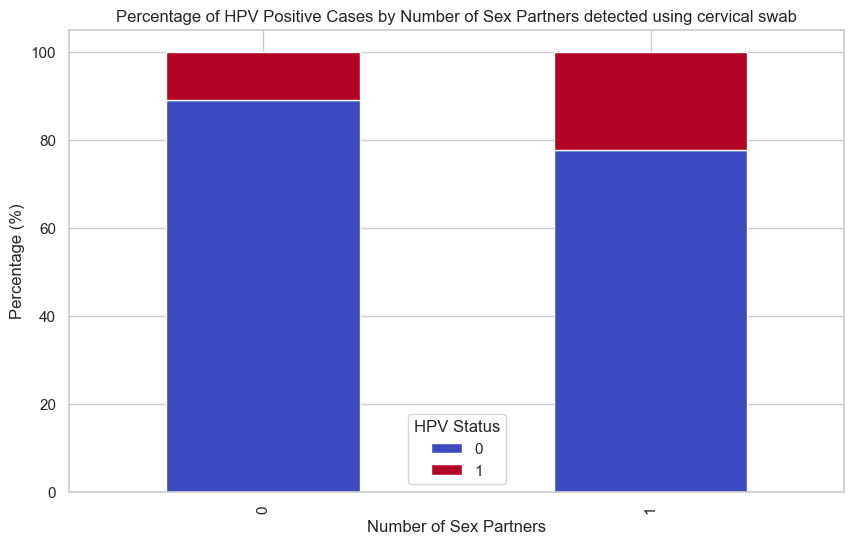

In [13]:
partner_hpv_counts = pd.crosstab(df["total No of sex partners"], df["cervical swab"], normalize="index") * 100

# Plot the stacked bar chart
partner_hpv_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")

# Labels & title
plt.title("Percentage of HPV Positive Cases by Number of Sex Partners detected using cervical swab")
plt.xlabel("Number of Sex Partners")
plt.ylabel("Percentage (%)")
plt.legend(title="HPV Status")
plt.show()

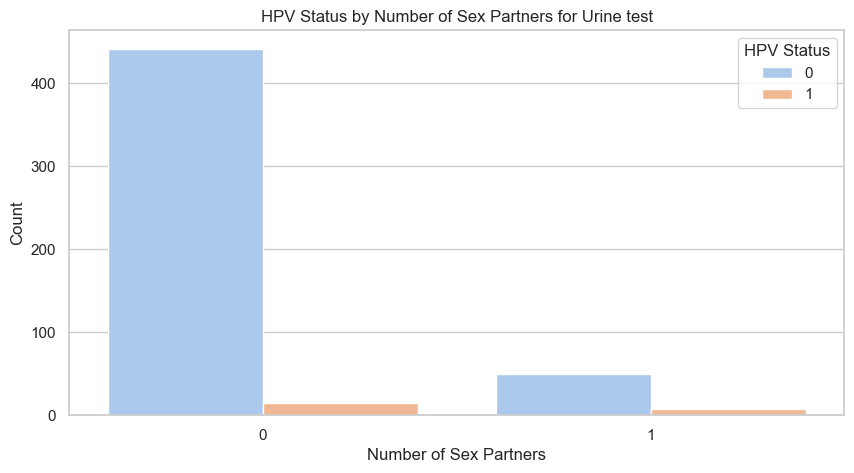

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x="total No of sex partners", hue="Urine ", data=df, palette="pastel")
plt.title("HPV Status by Number of Sex Partners for Urine test")
plt.xlabel("Number of Sex Partners")
plt.ylabel("Count")
plt.legend(title="HPV Status")
plt.show()

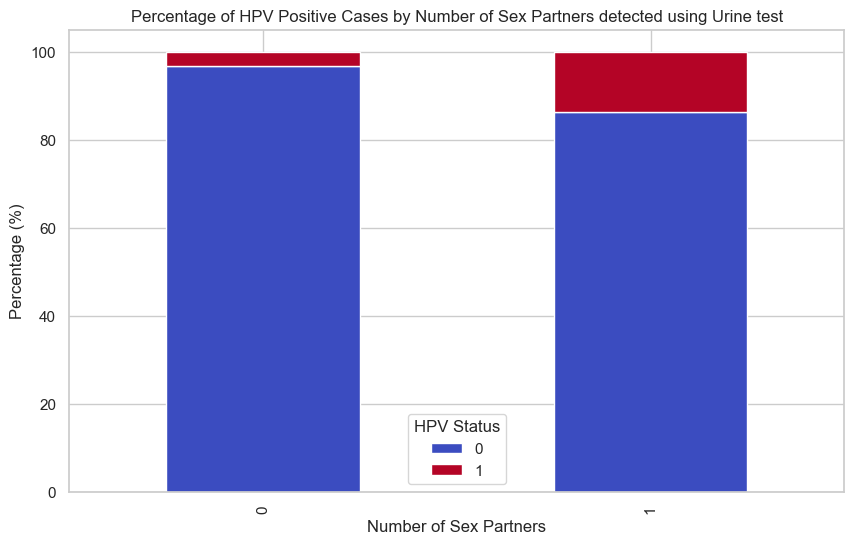

In [15]:
partner_hpv_counts = pd.crosstab(df["total No of sex partners"], df["Urine "], normalize="index") * 100

partner_hpv_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")


plt.title("Percentage of HPV Positive Cases by Number of Sex Partners detected using Urine test")
plt.xlabel("Number of Sex Partners")
plt.ylabel("Percentage (%)")
plt.legend(title="HPV Status")
plt.show()

# For Urine Test

In [16]:
contingency_table = pd.crosstab(df["total No of sex partners"], df["Urine "])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between number of sex partners and HPV status.")
else:
    print("No significant relationship found between number of sex partners and HPV status.")

Chi-Square Statistic: 10.977312114977096
P-value: 0.0009223410836031548
There is a significant relationship between number of sex partners and HPV status.


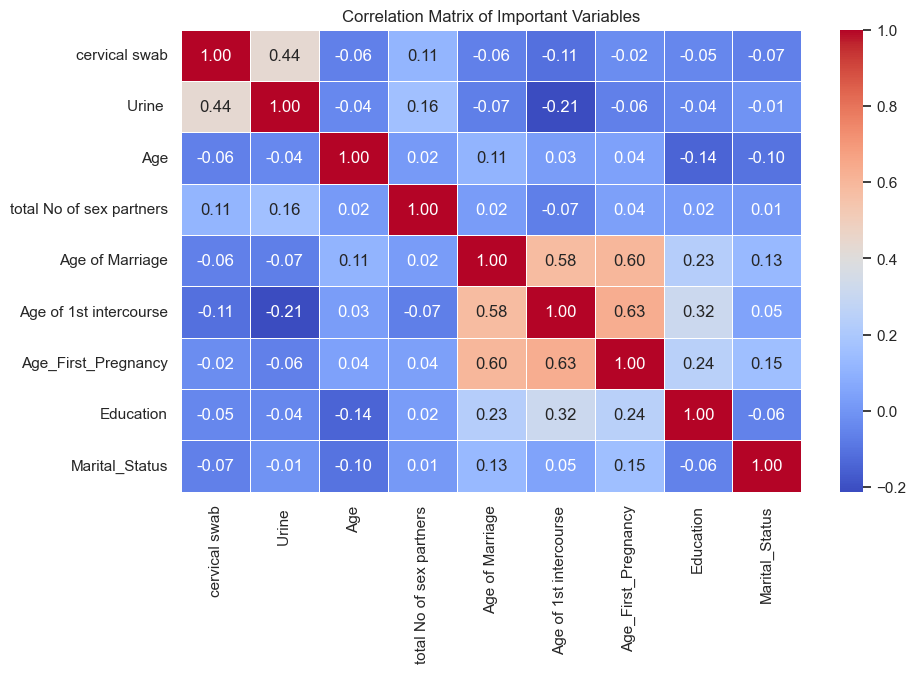

In [17]:
correlation_columns = [
    "cervical swab","Urine ", "Age", "total No of sex partners", "Age of Marriage",
    "Age of 1st intercourse", "Age_First_Pregnancy", "Education",
    "Marital_Status"
]

df_corr =df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Important Variables")
plt.show()


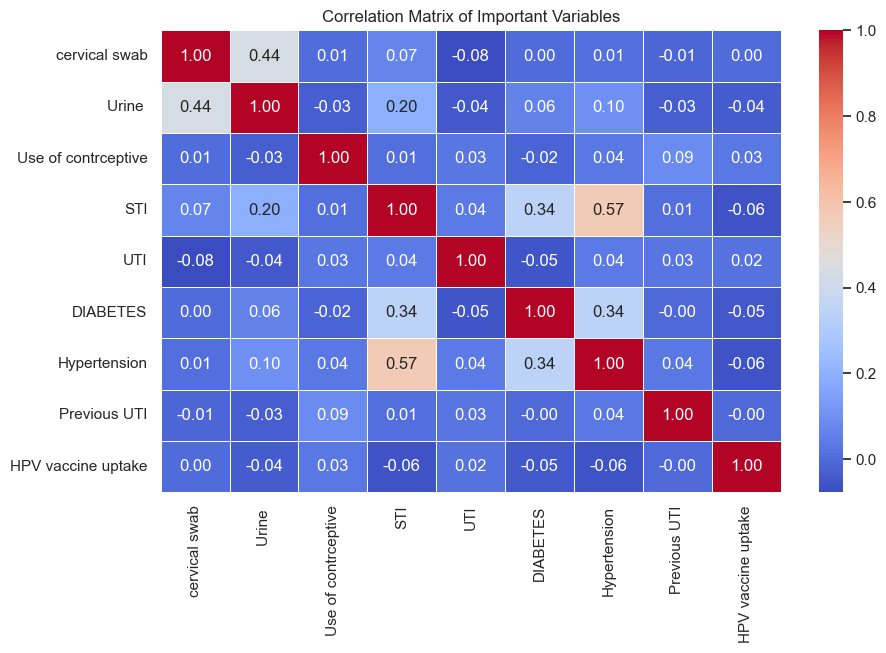

In [18]:
df["UTI"] = df["UTI"].replace({"NO": 0, "YES": 1})
correlation_columns2 = [
    "cervical swab","Urine ","Use of contrceptive","STI","UTI","DIABETES","Hypertension","Previous UTI","HPV vaccine uptake"
]

df_corr =df[correlation_columns2].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Important Variables")
plt.show()

cervical swab    0   1
Urine                 
0              447  45
1                5  18


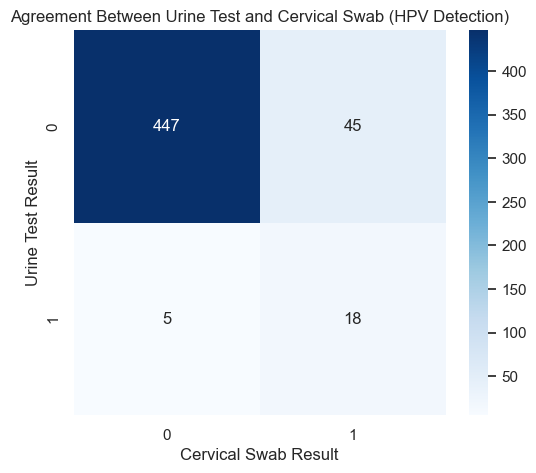

In [19]:
agreement_table = pd.crosstab(df["Urine "], df["cervical swab"])
print(agreement_table)


plt.figure(figsize=(6, 5))
sns.heatmap(agreement_table, annot=True, cmap="Blues", fmt="d")
plt.title("Agreement Between Urine Test and Cervical Swab (HPV Detection)")
plt.xlabel("Cervical Swab Result")
plt.ylabel("Urine Test Result")
plt.show()

The urine test may have lower sensitivity (misses 45 cases that the cervical swab catches).<br>
The cervical swab appears to be a more sensitive detection method for HPV.<br>
There are a few cases where urine detects HPV but cervical swab does not.

In [20]:
from statsmodels.stats.contingency_tables import mcnemar

table = [[447, 45],  
         [5, 18]]   


result = mcnemar(table, exact=True)
print(f"McNemar’s Test Statistic: {result.statistic}")
print(f"P-Value: {result.pvalue}")

if result.pvalue < 0.05:
    print("Statistically significant difference between Cervical swab and urine test results.")
else:
    print("No significant difference Cervical swab and urine test results.")


McNemar’s Test Statistic: 5.0
P-Value: 4.209852022540872e-09
Statistically significant difference between Cervical swab and urine test results.


In [21]:
hpv_types = [col for col in df.columns if "TYPE" in col]
df[hpv_types] = df[hpv_types].apply(pd.to_numeric, errors='coerce')

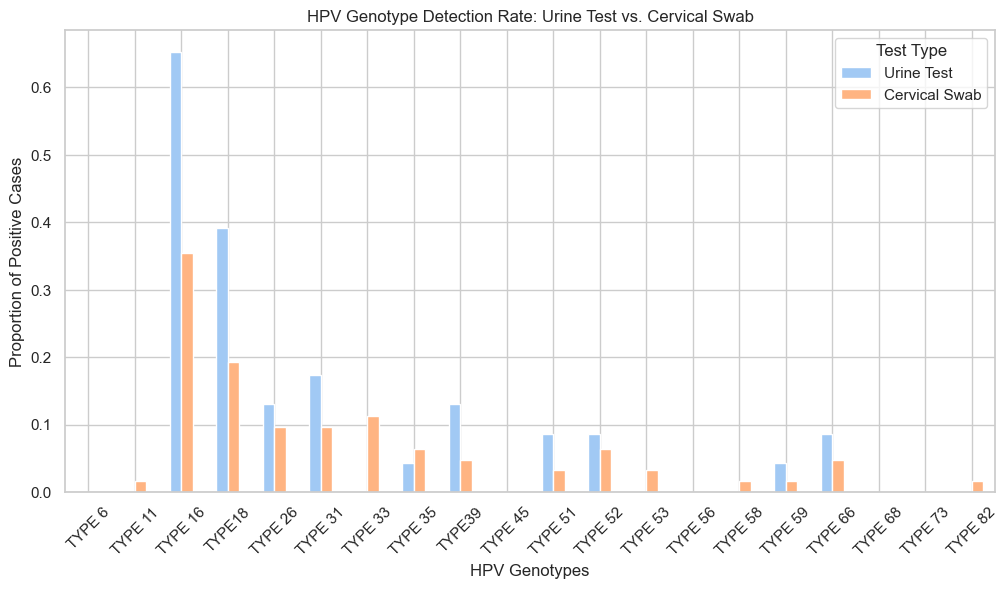

In [22]:


df_filtered = df[df[hpv_types].apply(lambda x: (x != 2).all(), axis=1)]

urine_types_avg = (df_filtered[df_filtered["Urine "] == 1][hpv_types] == 1).mean()
cervical_types_avg = (df_filtered[df_filtered["cervical swab"] == 1][hpv_types] == 1).mean()

hpv_comparison = pd.DataFrame({
    "Urine Test": urine_types_avg,
    "Cervical Swab": cervical_types_avg
})

hpv_comparison.plot(kind="bar", figsize=(12, 6))
plt.title("HPV Genotype Detection Rate: Urine Test vs. Cervical Swab")
plt.ylabel("Proportion of Positive Cases")
plt.xlabel("HPV Genotypes")
plt.xticks(rotation=45)
plt.legend(title="Test Type")
plt.show()

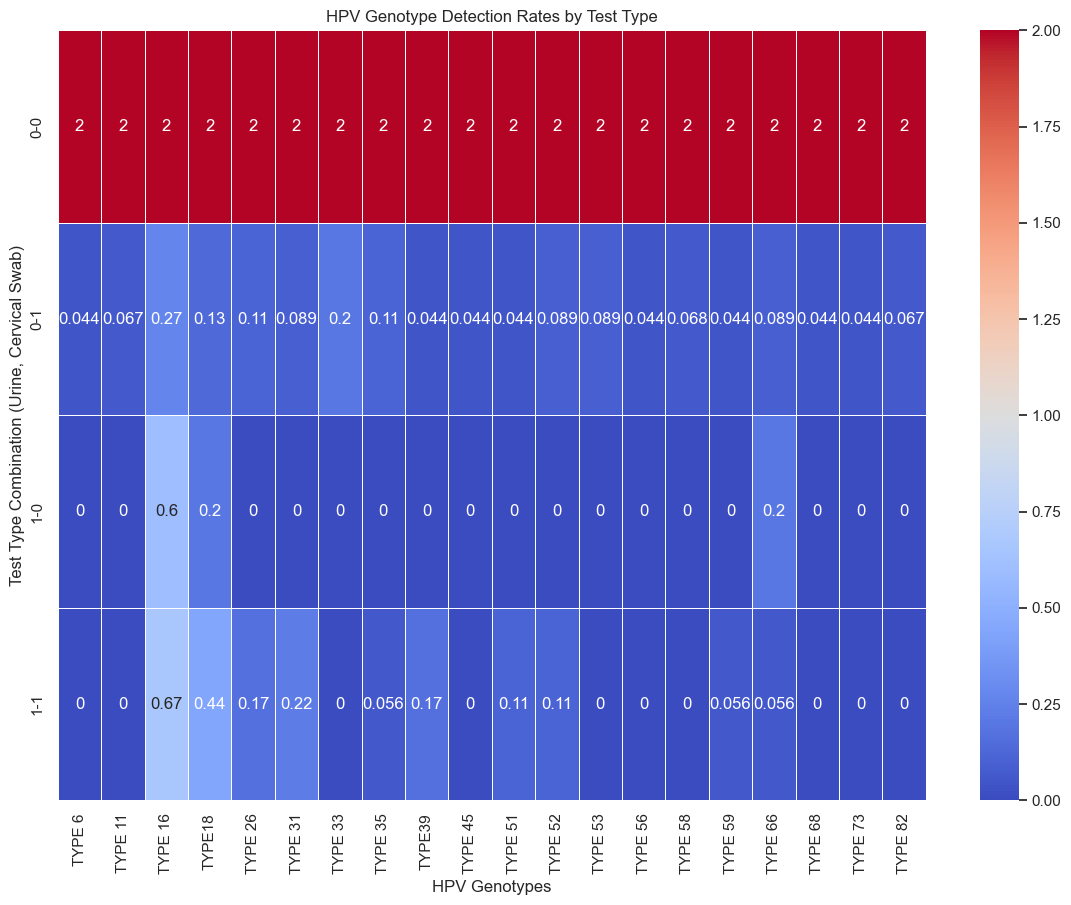

In [23]:
hpv_types = [col for col in df.columns if "TYPE" in col]

heatmap_data = df.groupby(["Urine ", "cervical swab"])[hpv_types].mean()

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("HPV Genotype Detection Rates by Test Type")
plt.xlabel("HPV Genotypes")
plt.ylabel("Test Type Combination (Urine, Cervical Swab)")
plt.show()

<Figure size 1000x600 with 0 Axes>

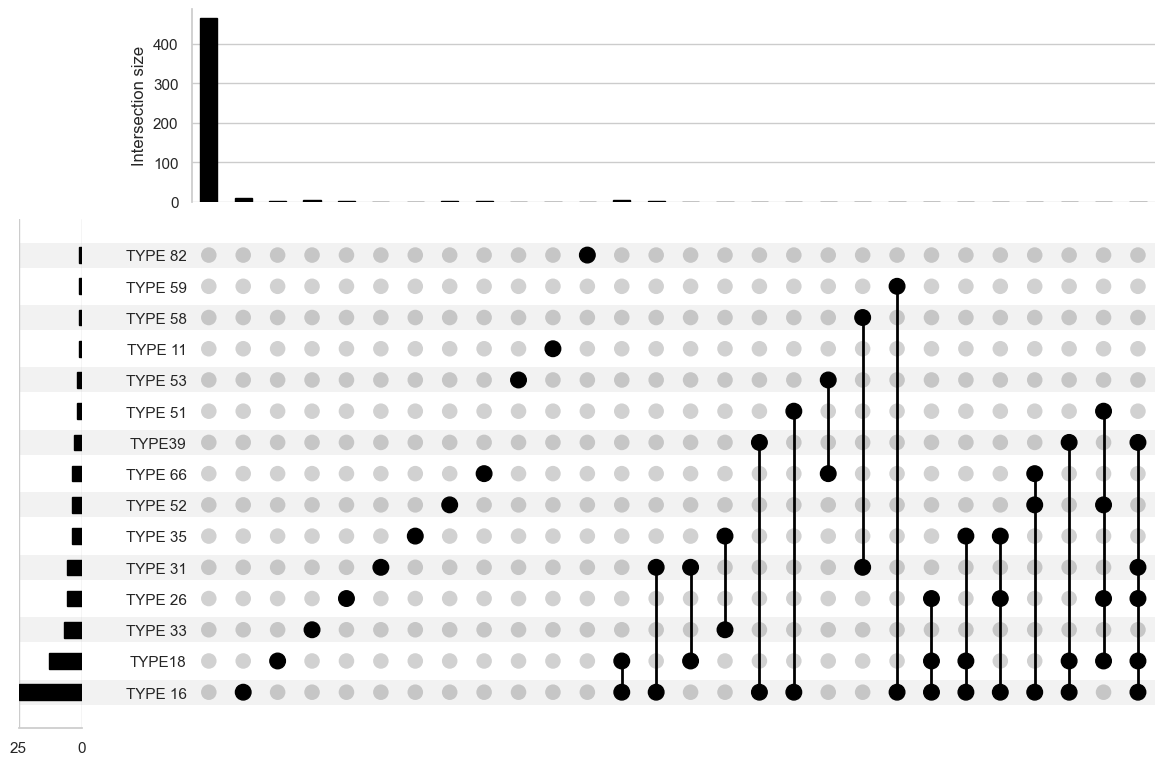

In [24]:
from upsetplot import UpSet, from_indicators

hpv_binary = df[hpv_types].applymap(lambda x: x == 1)

upset_data = from_indicators(hpv_binary.columns, hpv_binary)
plt.figure(figsize=(10, 6))
UpSet(upset_data).plot()
plt.show()

Key Observations:<br>
HPV Type 16 and 18 are the most frequently detected.<br>
Many individuals have multiple HPV types detected (shown by connected dots).<br>
Some genotypes rarely occur alone, but rather in combination with others.